In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


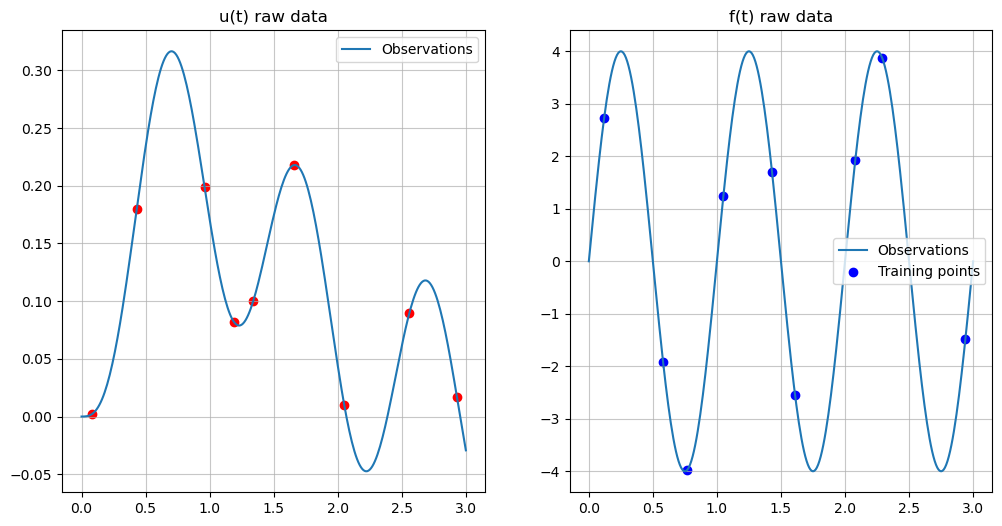

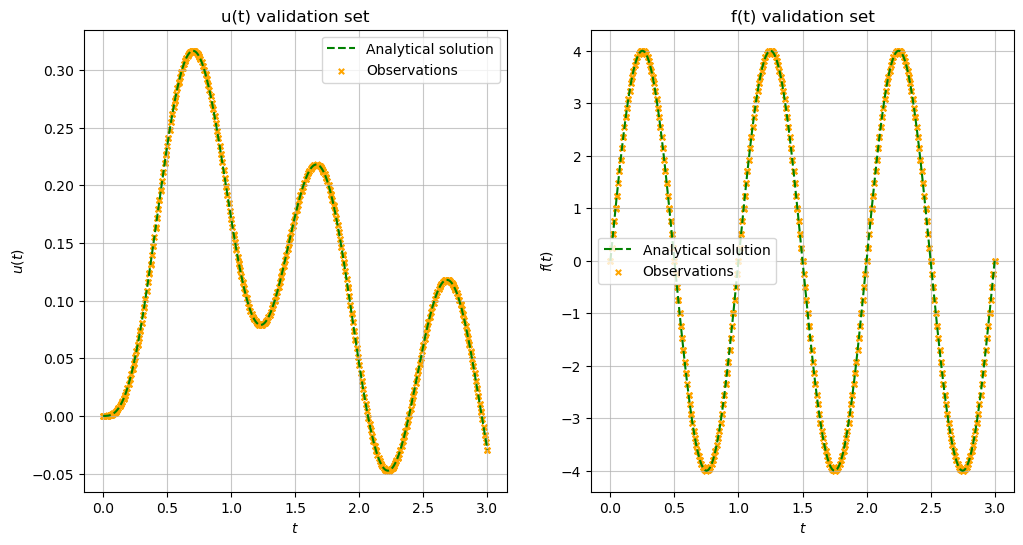

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model.set_training_data("damped_m1k2b1.csv",9,[1e-8,1e-8],seeds_training)
model.plot_raw_data(Training_points=True)
model.set_validation_data(1200)
model.plot_validation_set()


In [5]:

def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 1000, 10

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      

100%|██████████| 1000/1000 [01:02<00:00, 15.95it/s]


     fun: -3.67401123046875
     jac: array([-9.       , -4.5      ,  1.7070312, -1.3271484,  0.609375 ],
      dtype=float32)
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 67
     nit: 13
  status: 2
 success: True
       x: array([0.41480542, 0.25354046, 0.99538933, 1.97935186, 1.9845253 ])


In [ ]:
print(model.get_params())

[0.48909158 0.58601285 0.99895693 1.99258569 1.99875862]


In [ ]:
results = {"nf_n=9_melder": (np.array([0.47898825, 0.62987094, 0.998272  , 1.99920782, 2.00517421]),-4.336967468261719, [1e-8,1e-8]),
           "nf_n=9_TNC": (np.array([0.43243174, 0.30849485, 0.99643949, 1.98091363, 1.97461053]),-2.882169723510742, [1e-8,1e-8]),
            "nf_n=9_melder_4000":([0.48909158, 0.58601285, 0.99895693, 1.99258569, 1.99875862],-4.355005264282227, [1e-8,1e-8])}

In [ ]:
model.set_params(results["nf_n=9_melder_4000"][0])

{'u': 4.189706999113696e-07, 'f': 0.012251436710357666}

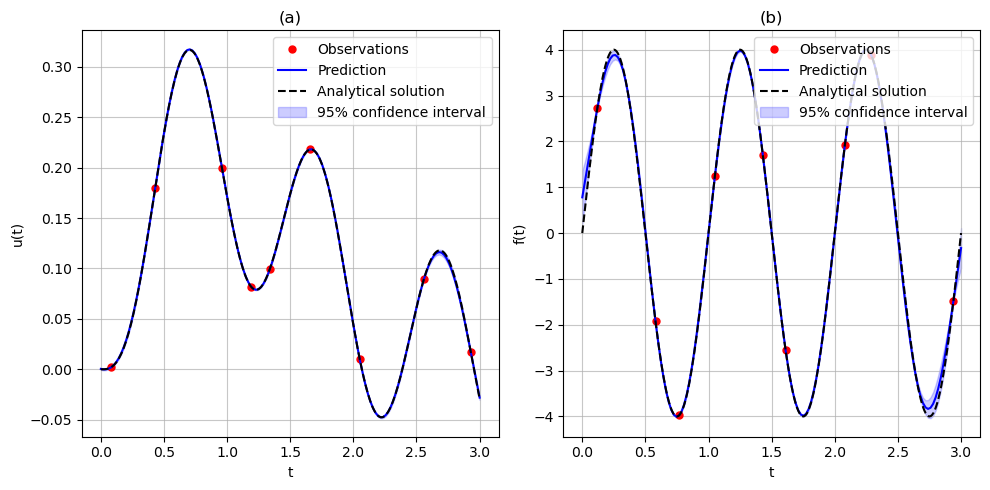

In [6]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
model.MSE
#print(model)

 /opt/homebrew/anaconda3/envs/bac/lib/python3.8/site-packages/GPy/core/__init__.py:80: FutureWarning:In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

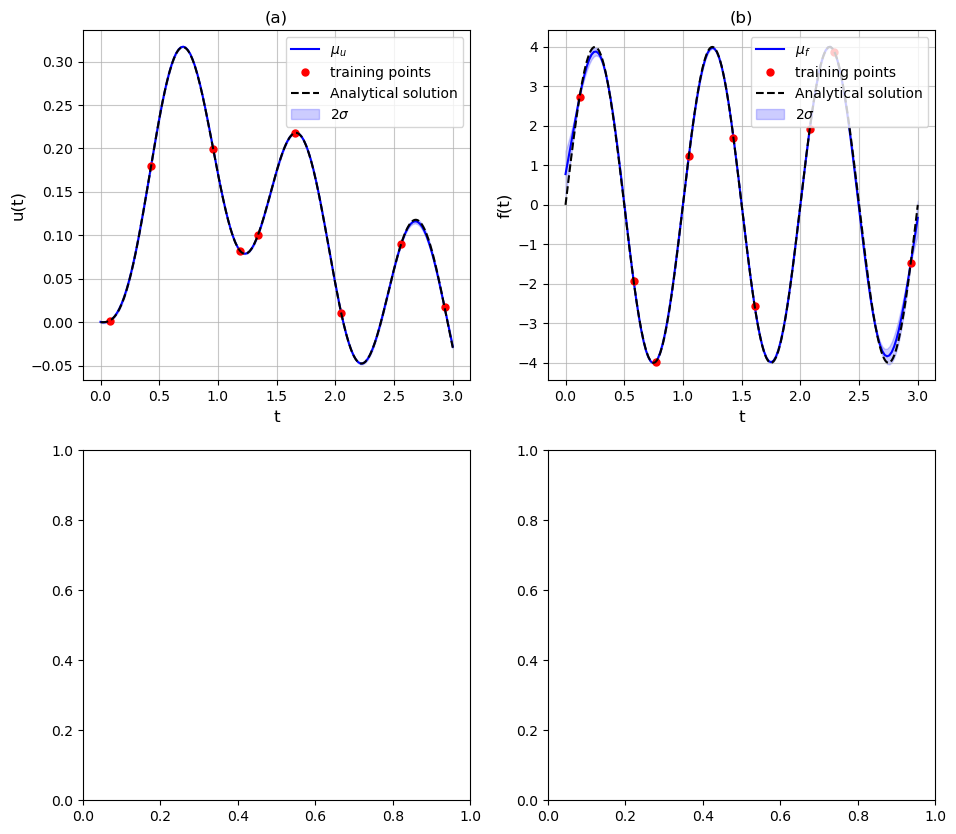

In [7]:
model.plot_merged_1d_plots(X_star, "merged_1d_plots.png",(11,10))

 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


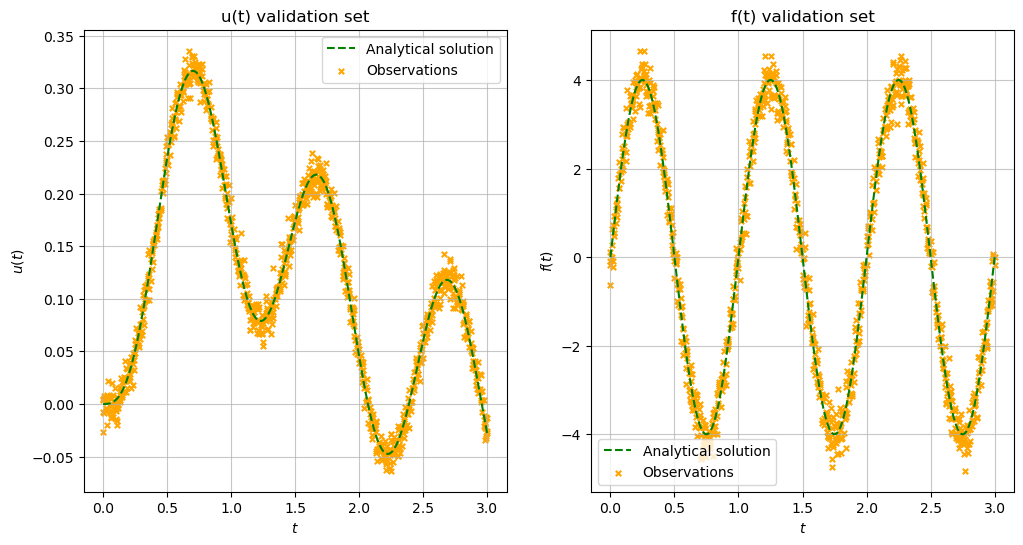

In [8]:
seeds_training = [50,38]
model2 = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model2.set_training_data("damped_m1k2b1.csv",9,[1e-4,1e-1],seeds_training)
model2.set_validation_data(1000)
model2.plot_validation_set()
#model2.plot_raw_data(Training_points=True)


In [9]:
n_iterations, n_threads = 800,12
model2.jitter = 1e-6
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial

model2.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})model2.set_params(x2)

100%|██████████| 800/800 [00:49<00:00, 16.04it/s]


     fun: 3.555901527404785
     jac: array([-0.01382446,  0.01321411,  0.00613403,  0.02371216,  0.00336599],
      dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 95
     nit: 13
  status: 1
 success: True
       x: array([0.36374951, 0.25222504, 0.98101411, 1.7230537 , 0.9650168 ])


-----------------------------------------------
GP with kernel: 
Training data: (9, 1)
Training targets: (18, 1)
Hyperparameters: {'l': 0.3637495072172969, 'sigma_f': 0.25222503662701135, 'm': 0.9810141060954948, 'b': 1.7230536964099161, 'k': 0.9650168023858514}
Log marginal likelihood: 3.555901527404785
Mean squared error: {'u': 0.00014305819058790803, 'f': 0.1539742797613144}
Relative l2 error: {'u': 0.07831216209045709, 'f': 0.1389638167723531}
-----------------------------------------------



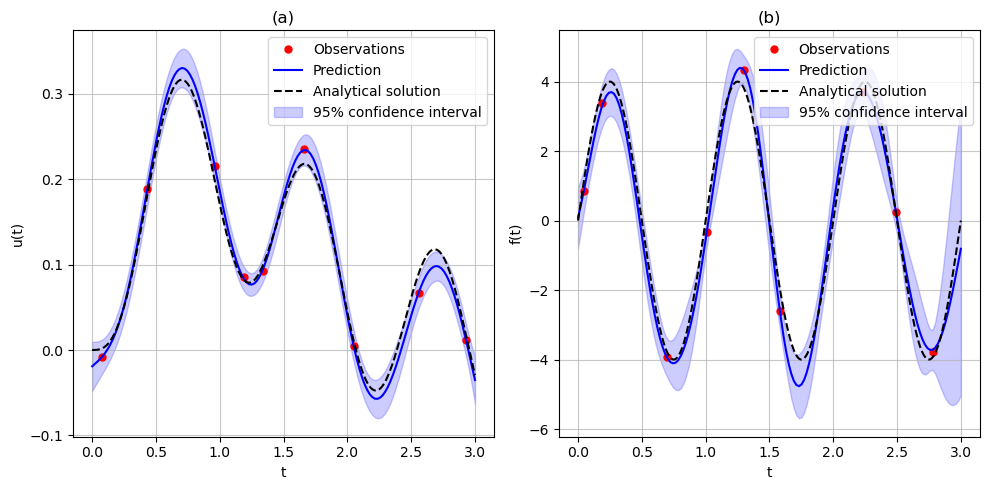

In [10]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model2.predict_model(X_star)
model2.plot_prediction(X_star,"oscillator_with_noise.png","oscillator_noise.png")
model2.error()
print(model2)
#model2.plot_merged_1d_plots(X_star, "o",(11,10))

fun: 3.555784225463867  
     jac: array([-0.06851196,  0.01727295, -0.0453949 ,  0.00055313, -0.00218439],  
      dtype=float32) 
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'   
    nfev: 96   
     nit: 18   
  status: 1 
 success: True 
       x: array([0.36329879, 0.25175648, 0.9802112 , 1.71165971, 0.95101893]) 
{'u': 0.07846240055987475, 'f': 0.1390139924376683}   

In [ ]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations = 1000
for n in [5,10,20,50]:
    print("This is model with n = ", n)
    modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
    modeln.set_training_data("damped_m1k2b1.csv",n,[1e-8,1e-8],seeds_training)
    modeln.set_validation_data(1000)
    modeln.train("Nelder-Mead",n_iterations,12,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
    modeln.predict_model(X_star)
    modeln.plot_prediction(X_star,"",None)
    modeln.error()
    #modeln.MSE
    print(modeln)
    print("-----------------------------------------------------------")